## Plotting only the largest groups

The goal of this notebook is to create a plot using only the largest groups of a dataset.  This technique is useful when there are many small groups that we may not be interested in and want to see trends among the largest groups.  

In [58]:
# import pandas
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

In [59]:
# read the csv

## NOTE THe data is too big to put in github so you can get it here.  Get the data before running the notebook and put
## the data in the same directory as the notebook

# Data is here https://drive.google.com/drive/folders/1B7QSEdfuJDnStNIlF3U3DbskdxUMDd1J
foods=pd.read_csv('Food_Inspections.csv')

In [60]:
# take a look at the shape and first few entries of data
print(foods.shape)
foods.head()

(201567, 17)


,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location
0,2362603,MOY LEE CHINESE RESTAURANT,MOY LEE CHINESE RESTAURANT,2698794.0,Restaurant,Risk 1 (High),5346 N MILWAUKEE AVE,CHICAGO,IL,60630.0,02/20/2020,Complaint,Fail,36. THERMOMETERS PROVIDED & ACCURATE - Comment...,41.977764,-87.769830,"(-87.76982985082259, 41.97776393135019)"
1,2362591,HALSTED QUICK SHOP,HALSTED QUICK SHOP,2712576.0,Grocery Store,Risk 1 (High),5601 S HALSTED ST,CHICAGO,IL,60621.0,02/20/2020,License,Fail,"3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL E...",41.792483,-87.644966,"(-87.6449659047179, 41.792482647024215)"
2,2362582,MC GEE'S JUKEBOX LOUNGE INC,MC GEE'S JUKEBOX LOUNGE INC,593.0,TAVERN,Risk 3 (Low),7000 S HALSTED ST,CHICAGO,IL,60621.0,02/20/2020,Complaint Re-Inspection,Pass,NaN,41.766922,-87.644602,"(-87.64460244736672, 41.766922435101215)"
3,2362539,SHABANI'S GTS FAST FOOD,GTS FAST FOOD,2713029.0,Restaurant,Risk 1 (High),5016 N Pulaski RD,CHICAGO,IL,60630.0,02/19/2020,License,Not Ready,NaN,41.972406,-87.728292,"(-87.72829150056414, 41.97240585532906)"
4,2362507,MIDLANE ESPORTS,MIDLANE ESPORTS,2684099.0,Restaurant,Risk 2 (Medium),2741 N MILWAUKEE AVE,CHICAGO,IL,60647.0,02/19/2020,License Re-Inspection,Pass,NaN,41.931042,-87.710406,"(-87.71040591126865, 41.93104159573519)"


In [61]:
# take a look at the number of unique entries.  This shows us how many different Restaurants there are
foods['DBA Name'].unique().shape

(27845,)

In [62]:
# form the groups
groups = foods.groupby('DBA Name')
#help(groups.Results.transform)

The below block is used to get rid of all the entries that belong to small groups... 

In [66]:
# get a list of the group lengths
group_len=groups.Results.transform(len);
print(group_len.shape)
# use the list to create a new list of restaurants only containing restaurants that have more than 500 entries
newfoods=foods[group_len>500]
print(newfoods.shape)
#newfoods=foods[foods.groupby('DBA Name').Results.transform(len)>500]

(201567,)
(4774, 17)


In [67]:
# check again how many unique restaurants there are... should be much smaller
newfoods['DBA Name'].unique().shape

(3,)

Now that we have a small number of unique entries, we can regroup and it will produce only a small number of groups, making it more convenient to plot

DBA Name       Results             
DUNKIN DONUTS  Business Not Located       3
               Fail                     213
               No Entry                   4
               Not Ready                 15
               Out of Business           59
               Pass                     854
               Pass w/ Conditions       284
MCDONALD'S     Fail                     113
               No Entry                   1
               Not Ready                  3
               Out of Business           27
               Pass                     369
               Pass w/ Conditions        69
SUBWAY         Fail                     349
               No Entry                   8
               Not Ready                 11
               Out of Business          174
               Pass                    1632
               Pass w/ Conditions       586
Name: Inspection ID, dtype: int64

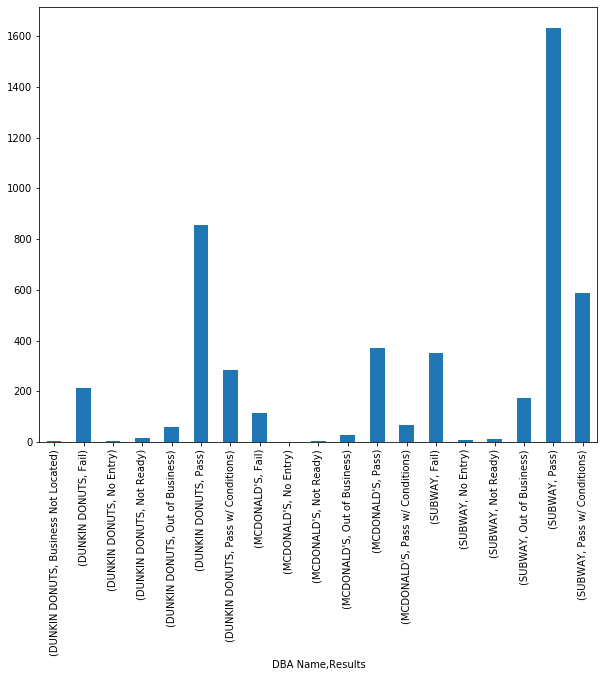

In [68]:
# now that we only have small groups let's group by DBA Name and Result
groups=newfoods.groupby(['DBA Name', 'Results'])
# and aggregate by counting the number of entries
aggregate=groups.count()['Inspection ID'];
#%matplotlib inline
# display the aggregated data
display(aggregate)
# and plot it with a bar plot
plt.figure(figsize=(10,8))
aggregate.plot.bar()